# Visualize Weather

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 22, 10
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 1000)

In [22]:
#get monthly forecast
historical = pd.read_csv('data/cleaned_data.csv')
forecast = pd.read_csv('data/future_forecast.csv')

In [18]:
historical.head()

,City,State,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Dew Point (degF),Relative Humidity (%),Precipitation Cover (%),Longitude,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Snow Depth (in),Sea Level Pressure (mb),Snow (in),Wind Gust (mph),Conditions
0,Akron,OH,180.46,41.08431,10.3,23.2,2017-01-01,0.00,23.3,66.47,0.00,-81.51431,33.7,42.2,9.5,10.5,0.41,1020.8,0.00,26.420465,Clear
1,Akron,OH,84.79,41.08431,82.1,33.0,2017-01-02,0.00,37.6,85.22,16.67,-81.51431,41.8,47.8,3.4,7.3,0.00,1020.3,0.00,26.420465,Overcast
2,Akron,OH,179.42,41.08431,90.3,42.0,2017-01-03,0.37,43.6,90.06,66.67,-81.51431,46.3,48.8,5.0,13.1,0.00,1005.3,0.00,29.800000,"Rain, Overcast"
3,Akron,OH,275.25,41.08431,95.8,20.8,2017-01-04,0.02,20.8,68.33,20.83,-81.51431,30.2,43.0,8.6,31.5,0.00,1008.3,0.00,39.600000,"Rain, Overcast"
4,Akron,OH,257.54,41.08431,74.0,12.6,2017-01-05,0.02,10.7,71.11,37.50,-81.51431,18.5,20.8,5.2,15.1,1.02,1015.0,1.02,24.200000,"Snow, Partially cloudy"


In [23]:
forecast.head()

,ds,yhat,yhat_lower,yhat_upper,City,State
0,2021-03-17,39.189635,28.137668,48.944044,Akron,OH
1,2021-03-18,39.683120,28.994067,50.173243,Akron,OH
2,2021-03-19,39.018493,28.654630,49.730548,Akron,OH
3,2021-03-20,38.816096,27.745327,49.136230,Akron,OH
4,2021-03-21,40.659844,30.097570,51.134979,Akron,OH


In [24]:
historical['Date time'] = pd.to_datetime(historical['Date time'], infer_datetime_format=True)

In [25]:
historical.dtypes

City                                  object
State                                 object
Wind Direction                       float64
Latitude                             float64
Cloud Cover (%)                      float64
Minimum Temperature (degF)           float64
Date time                     datetime64[ns]
Precipitation (in)                   float64
Dew Point (degF)                     float64
Relative Humidity (%)                float64
Precipitation Cover (%)              float64
Longitude                            float64
Temperature (degF)                   float64
Maximum Temperature (degF)           float64
Visibility (mi)                      float64
Wind Speed (mph)                     float64
Snow Depth (in)                      float64
Sea Level Pressure (mb)              float64
Snow (in)                            float64
Wind Gust (mph)                      float64
Conditions                            object
dtype: object

In [26]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']].astype(float)

In [27]:
forecast['ds'] = pd.to_datetime(forecast['ds'], infer_datetime_format=True)

In [134]:
ny['City'].values[0]

'New York'

## Visualize Historical Weather temperature and forecast

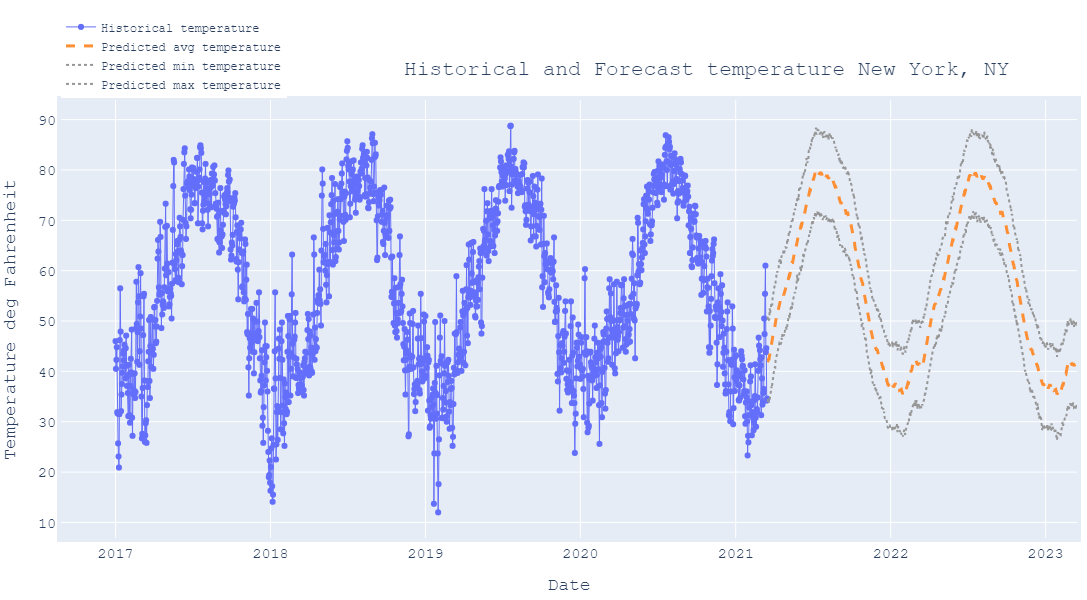

In [146]:
import plotly.graph_objects as go
layout = go.Layout(
        legend=dict(
        x=0,
        y=1.2,
        traceorder='normal',
        font=dict(size=12,),
        ))
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=ny_hist['Date time'], y=ny_hist['Temperature (degF)'],
                    line=dict(width=1),
                    mode='lines+markers',
                    name='Historical temperature'))
fig.add_trace(go.Scatter(x=ny['ds'], y=ny['yhat'],
                    line=dict(color='#FF8F34', width=3, dash='dash'),
                    name='Predicted avg temperature'))
fig.add_trace(go.Scatter(x=ny['ds'], y=ny['yhat_lower'],
                    line = dict(color='rgb(150,150,150)', width=2, dash='dot'),
                    name='Predicted min temperature'))
fig.add_trace(go.Scatter(x=ny['ds'], y=ny['yhat_upper'],
                    line = dict(color='rgb(150,150,150)', width=2, dash='dot'),
                    name='Predicted max temperature'))

fig.update_layout(autosize=False, width=980, height=600,
    margin=dict(l=10, r=10, b=10, t=100, pad=4),
    yaxis=dict(title_text="Temperature deg Fahrenheit"),
    xaxis=dict(title_text="Date"),
    font=dict(family="Courier New, monospace", size=15),
    title={
        'text': "Historical and Forecast temperature {}, {}".format(ny['City'].values[0], ny['State'].values[0]),
        'y':0.9,
        'x':0.65,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.show()

## Visualize Weather Conditions

In [180]:
conditions = pd.read_csv('data/weather_conditions.csv')

In [181]:
conditions.head()

,City,CloudyDays_avgPerYear,RainyDays_avgPerYear,SnowyDays_avgPerYear,State,SunnyDays_avgPerYear
0,Akron,164,70,48,OH,83
1,Albany,126,91,0,GA,148
2,Albany,239,67,46,NY,13
3,Albany,102,129,6,OR,129
4,Albuquerque,242,44,1,NM,79


In [182]:
conditions.dtypes

City                     object
CloudyDays_avgPerYear     int64
RainyDays_avgPerYear      int64
SnowyDays_avgPerYear      int64
State                    object
SunnyDays_avgPerYear      int64
dtype: object

In [186]:
minneapolis = conditions[conditions['City'] == 'Minneapolis']
minneapolis = minneapolis.reset_index().drop(columns='index')

In [193]:
y = minneapolis.T[0][['CloudyDays_avgPerYear', 'RainyDays_avgPerYear', 'SnowyDays_avgPerYear', 'SunnyDays_avgPerYear']]

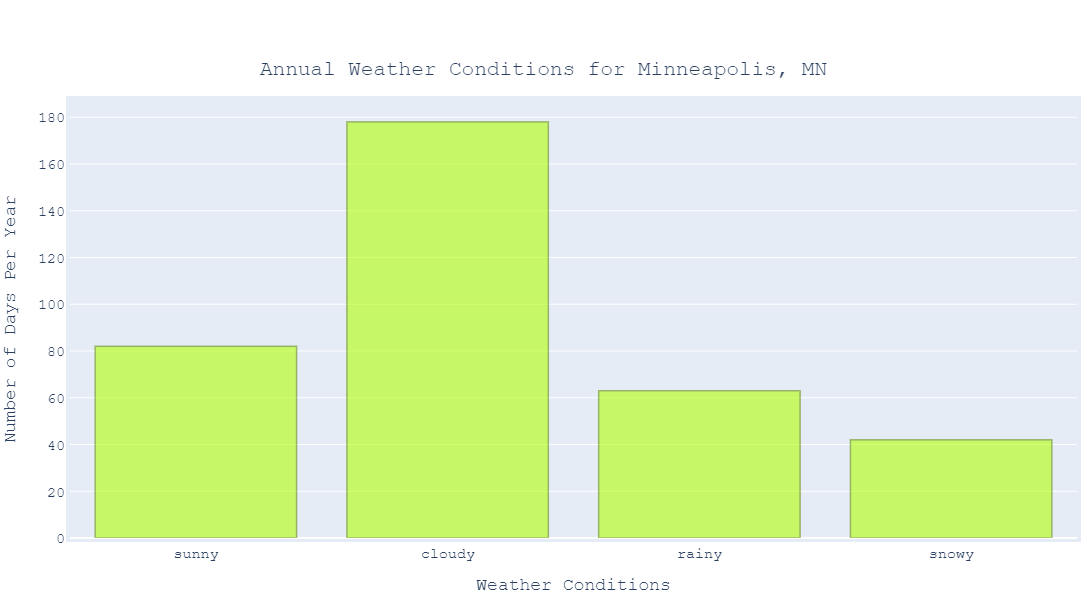

In [207]:
y = minneapolis.T[0]
fig = go.Figure([go.Bar(x=['sunny', 'cloudy', 'rainy', 'snowy'], 
                        y=y[['SunnyDays_avgPerYear', 'CloudyDays_avgPerYear', 'RainyDays_avgPerYear', 'SnowyDays_avgPerYear']],
                        hovertext=['Sunny Days per year', 'Cloudy Days per year', 'Rainy Days per year', 'Snowy Days per year'])])
fig.update_layout(
    autosize=False,
    width=980,
    height=600,
    margin=dict(l=10, r=10, b=10, t=100, pad=4),
    yaxis=dict(title_text="Number of Days Per Year"),
    xaxis=dict(title_text="Weather Conditions"),
    font=dict(family="Courier New, monospace", size=15),
    title={
        'text': "Annual Weather Conditions for {}, {}".format(y['City'], y['State']),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_color='rgb(177, 255, 8)', marker_line_color='rgb(97, 140, 3)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()